<a href="https://colab.research.google.com/github/midnightBlueNebula/predict-health-cost/blob/main/fcc_predict_health_costs_with_regression_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-06-15 19:19:31--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2022-06-15 19:19:32 (3.90 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset["sex"] = dataset["sex"].map({"male": 0, "female": 1})
dataset["smoker"] = dataset["smoker"].map({"no": 0, "yes": 1})
dataset["region"] = dataset["region"].map({"northwest": 0, "northeast": 1, 
                                           "southwest": 2, "southeast": 3,
                                           "midwest": 4, "mideast": 5})

print(dataset)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       2  16884.92
1      18    0  33.8         1       0       3   1725.55
2      28    0  33.0         3       0       3   4449.46
3      33    0  22.7         0       0       0  21984.47
4      32    0  28.9         0       0       0   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       0  10600.55
1334   18    1  31.9         0       0       1   2205.98
1335   18    1  36.9         0       0       3   1629.83
1336   21    1  25.8         0       0       2   2007.95
1337   61    1  29.1         0       1       0  29141.36

[1338 rows x 7 columns]


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset["expenses"]
print(train_labels)
test_labels = test_dataset["expenses"]

train_dataset.drop('expenses', 1, inplace=True)
test_dataset.drop('expenses', 1, inplace=True)

model = keras.Sequential()
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1))

model.compile(tf.optimizers.Adam(learning_rate=0.01), 
              loss=tf.losses.mean_absolute_error,
              metrics=[tf.keras.metrics.mae, tf.keras.metrics.mse])

model.fit(train_dataset, train_labels, epochs=100, verbose=1)

578      9724.53
610      8547.69
569     45702.02
1034    12950.07
198      9644.25
          ...   
584      1242.82
147      9877.61
160     21348.71
750     19539.24
859     10965.45
Name: expenses, Length: 1070, dtype: float64
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


34/34 [==============================] - 1s 3ms/step - loss: 12262.4844 - mean_absolute_error: 12262.4844 - mean_squared_error: 293959552.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7664.1934 - mean_absolute_error: 7664.1934 - mean_squared_error: 159142144.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7187.1250 - mean_absolute_error: 7187.1250 - mean_squared_error: 150744608.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6984.2192 - mean_absolute_error: 6984.2192 - mean_squared_error: 152582192.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6740.2324 - mean_absolute_error: 6740.2324 - mean_squared_error: 151887312.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6524.3652 - mean_absolute_error: 6524.3652 - mean_squared_error: 155686368.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6456.0806 - mean_ab

9/9 - 0s - loss: 3373.5808 - mean_absolute_error: 3373.5808 - mean_squared_error: 45744468.0000 - 145ms/epoch - 16ms/step
Testing set Mean Abs Error: 3373.58 expenses
You passed the challenge. Great job!


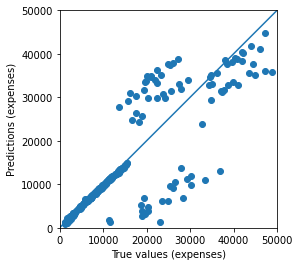

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
